In [89]:
%matplotlib inline
%config Completer.use_jedi = False


# Plotting data from a file

Plotting CPU usage values


In [90]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from glob import glob
from sklearn.metrics import auc

In [91]:
def get_mode_index(mode):
        idx = 0
        if mode == 'eps=0.02':
            idx = 1
        elif mode == 'eps=0.05':
            idx = 2
        elif mode == 'eps=0.10':
            idx = 3
        elif mode == 'eps=0.15':
            idx = 4
        elif mode == 'eps=0.20':
            idx = 5
        elif mode == 'eps=0.25':
            idx = 6
        elif mode == 'eps=0.30':
            idx = 7
        elif mode == 'eps=0.40':
            idx = 8
        elif mode == 'eps=0.50':
            idx = 9
        return idx;

Load the data
============

In [92]:
def load_cpu_data_from_csv(user_offset=0,skip_offset_for_mode='default'):
    task_tot_cpu_filenames = glob('taskmanager_System_CPU_Usage_*.csv')
    n_schedule_types = len(task_tot_cpu_filenames)
    task_tot_cpu_data = [None] * n_schedule_types
    for idx,f in enumerate(task_tot_cpu_filenames):
        fname_components = f.split("_")
        schedule_mode = fname_components[4] + "=0." + fname_components[6] + fname_components[7]
        idx = get_mode_index(schedule_mode)
        print("Reading " + f + " into index " + str(idx))
        task_tot_cpu_data[idx] = pd.read_csv(f)
        task_tot_cpu_data[idx]['schedule_mode'] = schedule_mode        
    
    for cpu_usage_dataset in task_tot_cpu_data:
        start_offset = 0
        if cpu_usage_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(cpu_usage_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        cpu_usage_dataset['time'] = pd.to_datetime(cpu_usage_dataset['time'], unit='ns', utc=True)
        cpu_usage_dataset['rel_time'] = round((cpu_usage_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        cpu_usage_dataset['formatted_time'] = cpu_usage_dataset['time'].dt.strftime("%H:%M:%S")
        
    # Read individual CPU data    
    individual_cpu_filenames = glob('jobmanager_System_CPU_UsageCPU*.csv')
    individual_cpu_data = pd.DataFrame()
    schedule_modes = []
    for idx, f in enumerate(individual_cpu_filenames):
        individual_cpu_dataset = pd.read_csv(f)
        fname_components = f.split("_")        
        schedule_mode = fname_components[4] + "=0." + fname_components[6] + fname_components[7]
        print("Reading individual CPU data for schedule mode " + schedule_mode)
        individual_cpu_dataset['schedule_mode'] = schedule_mode
        schedule_modes.append(schedule_mode)

        start_time = pd.to_datetime(individual_cpu_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        individual_cpu_dataset['time'] = pd.to_datetime(individual_cpu_dataset['time'], unit='ns', utc=True)
        individual_cpu_dataset['rel_time'] = round((individual_cpu_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        individual_cpu_dataset['formatted_time'] = individual_cpu_dataset['time'].dt.strftime("%H:%M:%S")
        
        cpu_id = individual_cpu_dataset.name.iloc[0].partition('taskmanager_System_CPU_UsageCPU')[-1]
        cpu_usage_name = "CPU " + cpu_id.rjust(2,'0') + " Usage"
        individual_cpu_dataset['cpu_id'] = int(cpu_id)
        individual_cpu_dataset['cpu_usage_name'] = cpu_usage_name
        if individual_cpu_data.empty :
            individual_cpu_data = individual_cpu_dataset
        else:
            individual_cpu_data = individual_cpu_data.append(individual_cpu_dataset)
        
        
    return task_tot_cpu_data, individual_cpu_data, set(schedule_modes)

def load_operator_data_from_csv(user_offset=0, skip_offset_for_mode='default'):
    task_operator_cpu_filenames = glob('taskmanager_job_task_operator_currentCpuUsage_*.csv')
    n_schedule_types = len(task_operator_cpu_filenames)
    task_operator_cpu_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_cpu_filenames):
        fname_components = f.split("_")        
        schedule_mode = fname_components[5] + "=0." + fname_components[7] + fname_components[8]
        idx = get_mode_index(schedule_mode)
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_cpu_data[idx] = pd.read_csv(f)
        task_operator_cpu_data[idx]['schedule_mode'] = schedule_mode
    
    for operator_cpu_dataset in task_operator_cpu_data:
        start_offset = 0
        if operator_cpu_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_cpu_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_cpu_dataset['time'] = pd.to_datetime(operator_cpu_dataset['time'], unit='ns', utc=True)
        operator_cpu_dataset['rel_time'] = round((operator_cpu_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_cpu_dataset['formatted_time'] = operator_cpu_dataset['time'].dt.strftime("%H:%M:%S")
        
    task_operator_rec_in_filenames = glob('taskmanager_job_task_operator_numRecordsInPerSecond_*.csv')
    task_operator_rec_in_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_rec_in_filenames):
        fname_components = f.split("_")        
        schedule_mode = fname_components[5] + "=0." + fname_components[7] + fname_components[8]
        idx = get_mode_index(schedule_mode)
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_rec_in_data[idx] = pd.read_csv(f)
        task_operator_rec_in_data[idx]['schedule_mode'] = schedule_mode        
    
    for operator_rec_in_dataset in task_operator_rec_in_data:
        start_offset = 0
        if operator_rec_in_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_rec_in_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_rec_in_dataset['time'] = pd.to_datetime(operator_rec_in_dataset['time'], unit='ns', utc=True)
        operator_rec_in_dataset['rel_time'] = round((operator_rec_in_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_rec_in_dataset['formatted_time'] = operator_rec_in_dataset['time'].dt.strftime("%H:%M:%S")

    task_operator_rec_out_filenames = glob('taskmanager_job_task_operator_numRecordsOutPerSecond_*.csv')
    task_operator_rec_out_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_rec_out_filenames):
        fname_components = f.split("_")        
        schedule_mode = fname_components[5] + "=0." + fname_components[7] + fname_components[8]
        idx = get_mode_index(schedule_mode)
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_rec_out_data[idx] = pd.read_csv(f)
        task_operator_rec_out_data[idx]['schedule_mode'] = schedule_mode        
    
    for operator_rec_out_dataset in task_operator_rec_out_data:
        start_offset = 0
        if operator_rec_out_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_rec_out_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_rec_out_dataset['time'] = pd.to_datetime(operator_rec_out_dataset['time'], unit='ns', utc=True)
        operator_rec_out_dataset['rel_time'] = round((operator_rec_out_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_rec_out_dataset['formatted_time'] = operator_rec_out_dataset['time'].dt.strftime("%H:%M:%S")

    task_operator_rec_proc_filenames = glob('taskmanager_job_task_operator_numRecordsProcessedPerSecond_*.csv')
    task_operator_rec_proc_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_rec_proc_filenames):
        fname_components = f.split("_")        
        schedule_mode = fname_components[5] + "=0." + fname_components[7] + fname_components[8]
        idx = get_mode_index(schedule_mode)
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_rec_proc_data[idx] = pd.read_csv(f)
        task_operator_rec_proc_data[idx]['schedule_mode'] = schedule_mode
    
    for operator_rec_proc_dataset in task_operator_rec_proc_data:
        start_offset = 0
        if operator_rec_proc_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_rec_proc_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_rec_proc_dataset['time'] = pd.to_datetime(operator_rec_proc_dataset['time'], unit='ns', utc=True)
        operator_rec_proc_dataset['rel_time'] = round((operator_rec_proc_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_rec_proc_dataset['formatted_time'] = operator_rec_proc_dataset['time'].dt.strftime("%H:%M:%S")
        
    return task_operator_cpu_data, task_operator_rec_in_data, \
                task_operator_rec_out_data, task_operator_rec_proc_data

In [93]:
task_tot_cpu_data, individual_cpu_data, schedule_modes  = load_cpu_data_from_csv(0, 'eps_0_0_1')
task_tot_cpu_data[0].head()

Reading taskmanager_System_CPU_Usage_eps_0_2_0_2021_01_17.csv into index 5
Reading taskmanager_System_CPU_Usage_eps_0_4_0_2021_01_17.csv into index 8
Reading taskmanager_System_CPU_Usage_eps_0_2_5_2021_01_17.csv into index 6
Reading taskmanager_System_CPU_Usage_eps_0_3_0_2021_01_17.csv into index 7
Reading taskmanager_System_CPU_Usage_eps_0_1_0_2021_01_17.csv into index 3
Reading taskmanager_System_CPU_Usage_eps_0_5_0_2021_01_17.csv into index 9
Reading taskmanager_System_CPU_Usage_eps_0_0_2_2021_01_17.csv into index 1
Reading taskmanager_System_CPU_Usage_eps_0_0_1_2021_01_17.csv into index 0
Reading taskmanager_System_CPU_Usage_eps_0_1_5_2021_01_17.csv into index 4
Reading taskmanager_System_CPU_Usage_eps_0_0_5_2021_01_17.csv into index 2
Reading individual CPU data for schedule mode eps=0.10
Reading individual CPU data for schedule mode eps=0.01
Reading individual CPU data for schedule mode eps=0.30
Reading individual CPU data for schedule mode eps=0.01
Reading individual CPU data fo

,name,time,host,tm_id,value,schedule_mode,rel_time,formatted_time
0,taskmanager_System_CPU_Usage,2021-01-17 09:55:08.523000+00:00,127.0.1.1,bd01e47fbc0707b2b988d32a7cf5470c,35.479151,eps=0.01,0.0,09:55:08
1,taskmanager_System_CPU_Usage,2021-01-17 09:55:38.683000+00:00,127.0.1.1,bd01e47fbc0707b2b988d32a7cf5470c,31.151132,eps=0.01,0.5,09:55:38
2,taskmanager_System_CPU_Usage,2021-01-17 09:56:08.710000+00:00,127.0.1.1,bd01e47fbc0707b2b988d32a7cf5470c,30.044291,eps=0.01,1.0,09:56:08
3,taskmanager_System_CPU_Usage,2021-01-17 09:56:38.732000+00:00,127.0.1.1,bd01e47fbc0707b2b988d32a7cf5470c,24.218945,eps=0.01,1.5,09:56:38
4,taskmanager_System_CPU_Usage,2021-01-17 09:57:08.794000+00:00,127.0.1.1,bd01e47fbc0707b2b988d32a7cf5470c,25.844882,eps=0.01,2.0,09:57:08


Task Manager CPU Usage
-----------



In [94]:
task_tot_cpu_data[0]['schedule_mode'][0]

'eps=0.01'

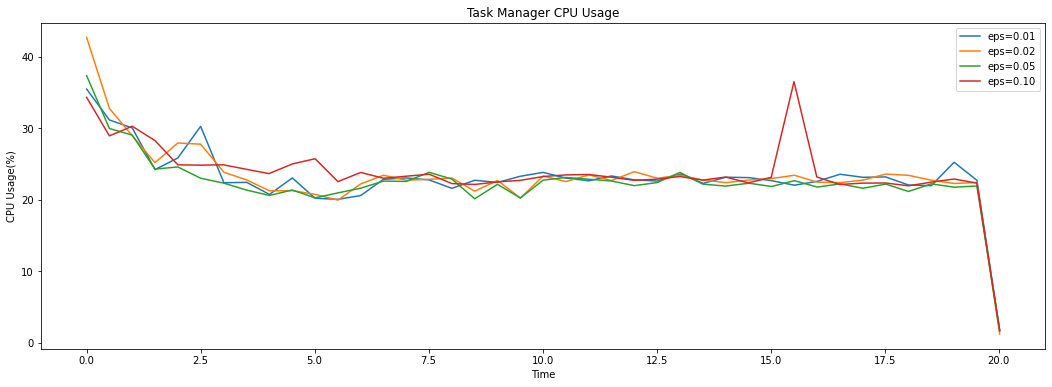

In [95]:
fig,ax = plt.subplots(figsize=(18,6))

ax.plot(task_tot_cpu_data[0]['rel_time'], task_tot_cpu_data[0]['value'], label=task_tot_cpu_data[0]['schedule_mode'][0])
ax.plot(task_tot_cpu_data[1]['rel_time'], task_tot_cpu_data[1]['value'], label=task_tot_cpu_data[1]['schedule_mode'][0])
ax.plot(task_tot_cpu_data[2]['rel_time'], task_tot_cpu_data[2]['value'], label=task_tot_cpu_data[2]['schedule_mode'][0])
ax.plot(task_tot_cpu_data[3]['rel_time'], task_tot_cpu_data[3]['value'], label=task_tot_cpu_data[3]['schedule_mode'][0])

ax.set(xlabel='Time', ylabel='CPU Usage(%)',
       title='Task Manager CPU Usage')
ax.tick_params(axis='x', rotation=0)
ax.legend(loc='upper right')
plt.savefig('task_manager_cpu_usage.png')
plt.show()

In [96]:
individual_cpu_data.head()

,name,time,value,schedule_mode,rel_time,formatted_time,cpu_id,cpu_usage_name
0,taskmanager_System_CPU_UsageCPU6,2021-01-17 11:22:00.327000+00:00,48.508946,eps=0.10,0.0,11:22:00,6,CPU 06 Usage
1,taskmanager_System_CPU_UsageCPU6,2021-01-17 11:22:30.434000+00:00,17.165669,eps=0.10,0.5,11:22:30,6,CPU 06 Usage
2,taskmanager_System_CPU_UsageCPU6,2021-01-17 11:23:00.461000+00:00,44.710579,eps=0.10,1.0,11:23:00,6,CPU 06 Usage
3,taskmanager_System_CPU_UsageCPU6,2021-01-17 11:23:30.482000+00:00,15.338645,eps=0.10,1.5,11:23:30,6,CPU 06 Usage
4,taskmanager_System_CPU_UsageCPU6,2021-01-17 11:24:00.499000+00:00,41.317365,eps=0.10,2.0,11:24:00,6,CPU 06 Usage


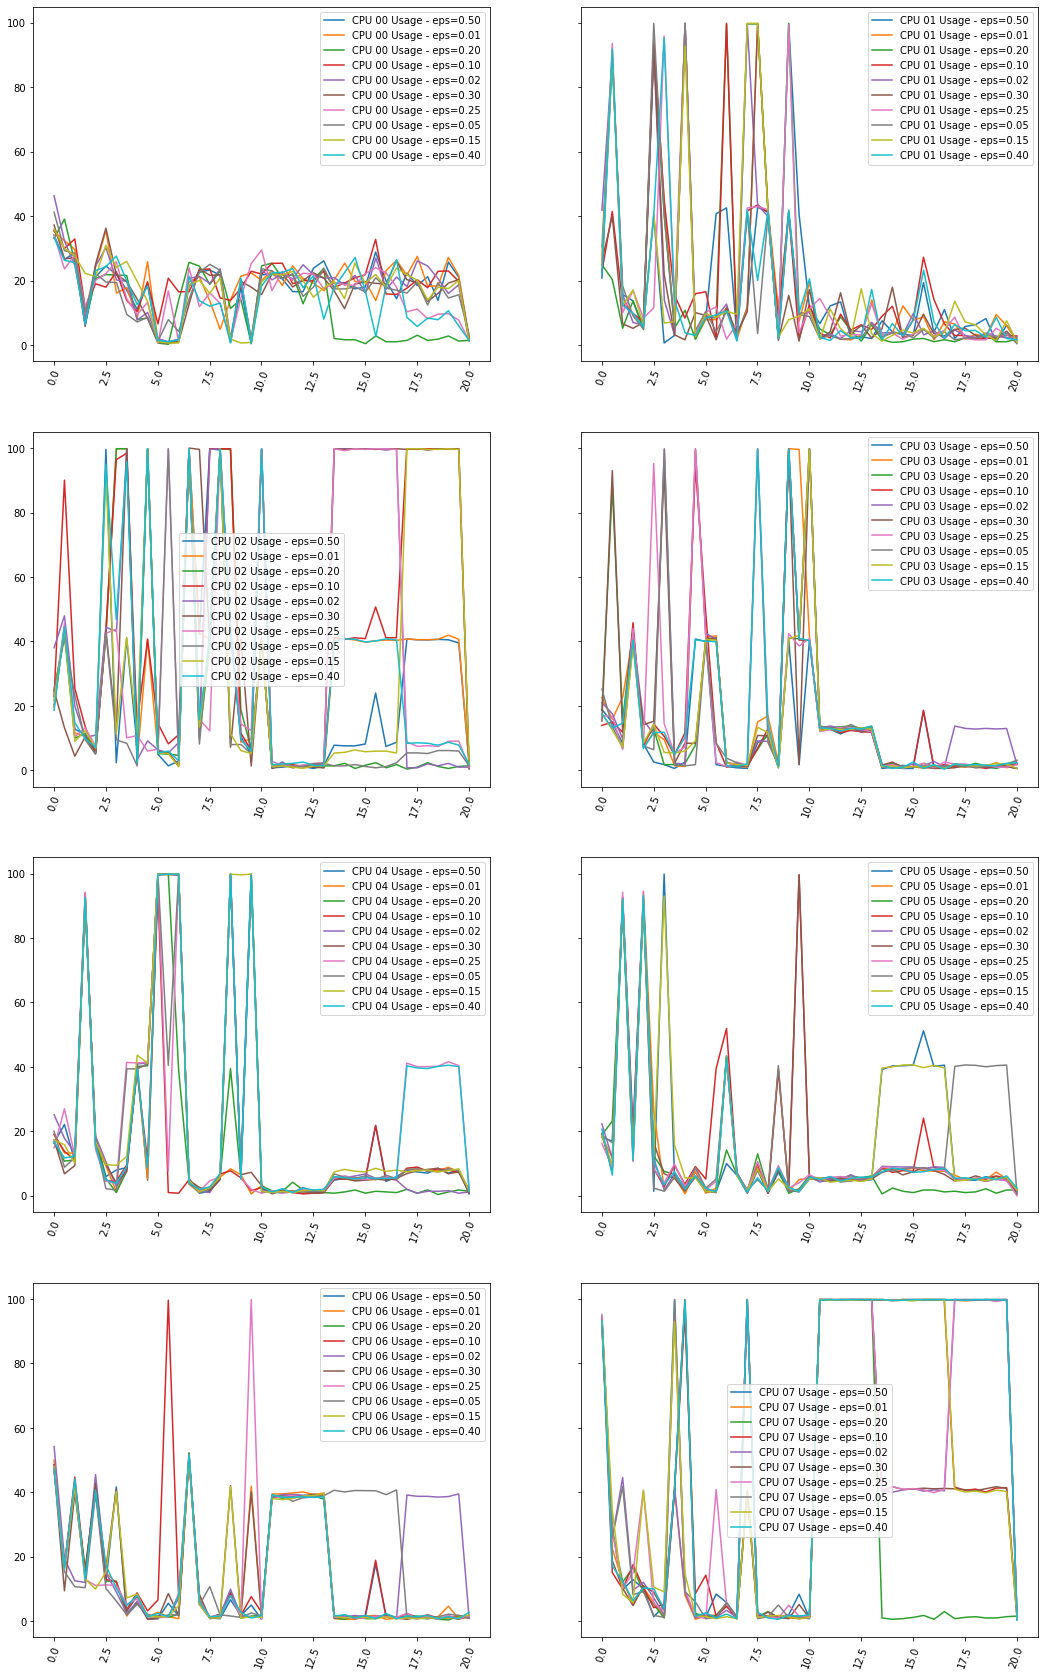

In [97]:
fig, axes = plt.subplots(4,2, figsize=(18,30), sharey=True)
loc_placement = 'best'
x_tick_rotation = 70

for mode_idx, mode_name in enumerate(schedule_modes):
    mode_cpu_data = individual_cpu_data.loc[individual_cpu_data['schedule_mode'] == mode_name]
    for idx, ax in enumerate(axes):
        specific_cpu_data_1 = mode_cpu_data.loc[mode_cpu_data['cpu_id'] == idx * 2]
        specific_cpu_data_2 = mode_cpu_data.loc[mode_cpu_data['cpu_id'] == (idx * 2 + 1)]

        label_1 = specific_cpu_data_1.iloc[0]['cpu_usage_name'] + " - " + mode_name
        label_2 = specific_cpu_data_2.iloc[0]['cpu_usage_name'] + " - " + mode_name
        
        ax[0].plot(specific_cpu_data_1['rel_time'], specific_cpu_data_1['value'], 
                   'C' + str(mode_idx),label=label_1)
        ax[0].tick_params(axis='x', rotation=x_tick_rotation )
        ax[0].legend(loc=loc_placement)

        ax[1].plot(specific_cpu_data_2['rel_time'], specific_cpu_data_2['value'], 
                   'C' + str(mode_idx),label=label_2)
        ax[1].tick_params(axis='x', rotation=x_tick_rotation)
        ax[1].legend(loc=loc_placement)
    
plt.savefig('cpu_usage_metrics.png')

In [98]:
t_op_cpu_use, t_op_rec_in, t_op_rec_out, t_op_rec_proc = load_operator_data_from_csv(0)

#t_op_cpu_use[0] = t_op_cpu_use[0].loc[~t_op_cpu_use[0]['operator_name'].isin(['Sink: count-sink','word-count'])]

for operator_cpu_usage in t_op_cpu_use:
    drop_index = operator_cpu_usage[operator_cpu_usage['operator_name'].isin(['Sink: count-sink',
                                                                              'word-count'])].index
    operator_cpu_usage.drop(drop_index, inplace=True)
    operator_cpu_usage['temp_col'] = operator_cpu_usage['operator_name'].str.partition(":")[2]
    operator_cpu_usage.loc[operator_cpu_usage['temp_col'] != '', ['operator_name']] = \
                                                                operator_cpu_usage['temp_col']
    operator_cpu_usage['formatted_id'] = operator_cpu_usage['operator_name'] + \
        "-" + operator_cpu_usage['subtask_index'].astype(str)
    operator_cpu_usage.drop(columns=['name','subtask_index','temp_col'], inplace=True)
    operator_cpu_usage['value'] = (operator_cpu_usage['value'] / 1000000000.0).round(3)

operator_ids = t_op_cpu_use[0].formatted_id.unique()
print(operator_ids)
    
for operator_records_in  in t_op_rec_in:
    drop_index = operator_records_in[operator_records_in['operator_name'].isin(
        ['word-count -> Sink: count-sink'])].index
    operator_records_in.drop(drop_index, inplace=True)
    operator_records_in.loc[operator_records_in['operator_name'].str.partition(":")[2] != '', 
                             ['operator_name']] = operator_records_in['operator_name'].str.partition(":")[2]
    operator_records_in['formatted_id'] = operator_records_in['operator_name'] + \
        "-" + operator_records_in['subtask_index'].astype(str)
    operator_records_in.drop(columns=['name','subtask_index'], inplace=True)

for operator_records_out  in t_op_rec_out: 
    drop_index = operator_records_out[operator_records_out['operator_name'].isin(['Sink: count-sink',
                                                                'word-count -> Sink: count-sink'])].index
    operator_records_out.drop(drop_index, inplace=True)
    operator_records_out.loc[operator_records_out['operator_name'].str.partition(":")[2] != '', 
                             ['operator_name']] = operator_records_out['operator_name'].str.partition(":")[2]
    operator_records_out['formatted_id'] = operator_records_out['operator_name'] + \
        "-" + operator_records_out['subtask_index'].astype(str)
    operator_records_out.drop(columns=['name','subtask_index'], inplace=True)

# t_op_cpu_use[3].loc[(t_op_cpu_use[3]['operator_name'] == 'Source: sentence-stream') &
#                     (t_op_cpu_use[3]['value'] != 0)].head(60)

t_op_rec_proc[1][['rel_time','rate']][10:20]

Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_1_5_2021_01_17.csv into index 4 with schedule mode eps=0.15
Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_0_1_2021_01_17.csv into index 0 with schedule mode eps=0.01
Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_2_0_2021_01_17.csv into index 5 with schedule mode eps=0.20
Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_1_0_2021_01_17.csv into index 3 with schedule mode eps=0.10
Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_5_0_2021_01_17.csv into index 9 with schedule mode eps=0.50
Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_0_2_2021_01_17.csv into index 1 with schedule mode eps=0.02
Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_0_5_2021_01_17.csv into index 2 with schedule mode eps=0.05
Reading taskmanager_job_task_operator_currentCpuUsage_eps_0_4_0_2021_01_17.csv into index 8 with schedule mode eps=0.40
Reading taskmanager_job_task_operator_cu

,rel_time,rate
10,0.5,1560.133333
11,0.5,2340.050000
12,0.5,1560.383333
13,0.5,2340.500000
14,0.5,1552.950000
15,0.5,2329.366667
16,0.5,10287.050000
17,0.5,28538.100000
18,0.5,14740.966667
19,0.5,36400.500000


In [99]:
grouped_operator_rec_in = []
grouped_operator_rec_out = []
grouped_operator_rec_proc = []

for operator_records_in  in t_op_rec_in:
    grouped_operator_rec_in.append(operator_records_in.groupby(['rel_time','schedule_mode',
                                                                'operator_name']).sum().reset_index())

for operator_records_out  in t_op_rec_out: 
    grouped_operator_rec_out.append(operator_records_out.groupby(['rel_time','schedule_mode',
                                                                  'operator_name']).sum().reset_index())

for operator_records_proc  in t_op_rec_proc: 
    grouped_operator_rec_proc.append(operator_records_proc.groupby(['rel_time',
                                                                    'schedule_mode']).sum().reset_index())
    
in_operator_names = grouped_operator_rec_in[0].operator_name.unique()
out_operator_names = grouped_operator_rec_out[0].operator_name.unique()
grouped_operator_rec_proc[2].head(50)

,rel_time,schedule_mode,rate
0,0.00,eps=0.05,0.000000
1,0.50,eps=0.05,120071.200000
2,1.00,eps=0.05,228848.533333
3,1.50,eps=0.05,218886.266667
4,2.00,eps=0.05,220737.533333
5,2.50,eps=0.05,222559.200000
6,3.01,eps=0.05,221885.150000
7,3.51,eps=0.05,217741.433333
8,4.01,eps=0.05,219359.966667
9,4.51,eps=0.05,223926.783333


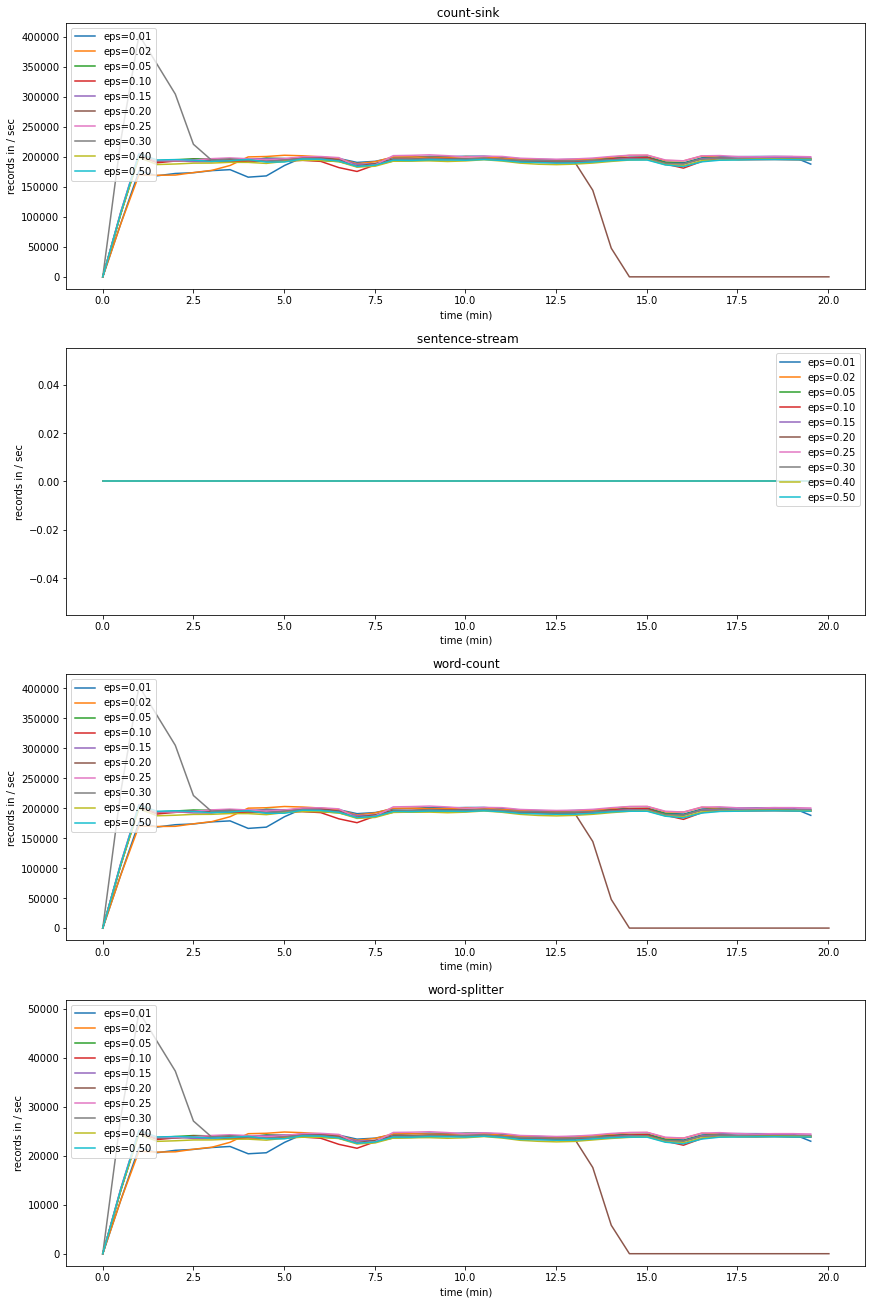

In [100]:
fig, axes = plt.subplots(len(in_operator_names), figsize=(12,18), constrained_layout=True)
x_tick_rotation = 0

for idx, ax in enumerate(axes):
    label_1 = in_operator_names[idx]
    ax.set_title(label_1)
    ax.tick_params(axis='x', rotation=x_tick_rotation )
    for grp_op_rec_in_dataset in grouped_operator_rec_in:
        specific_op_rec_in = grp_op_rec_in_dataset.loc[
            grp_op_rec_in_dataset['operator_name'] == in_operator_names[idx]]
        schedule_mode = specific_op_rec_in['schedule_mode'].unique()[0]
        ax.plot(specific_op_rec_in['rel_time'], specific_op_rec_in['rate'],
                label=schedule_mode)    
        ax.set_xlabel('time (min)')
        ax.set_ylabel('records in / sec')

        ax.legend(loc='best')

plt.savefig('operator_metrics_in.png')

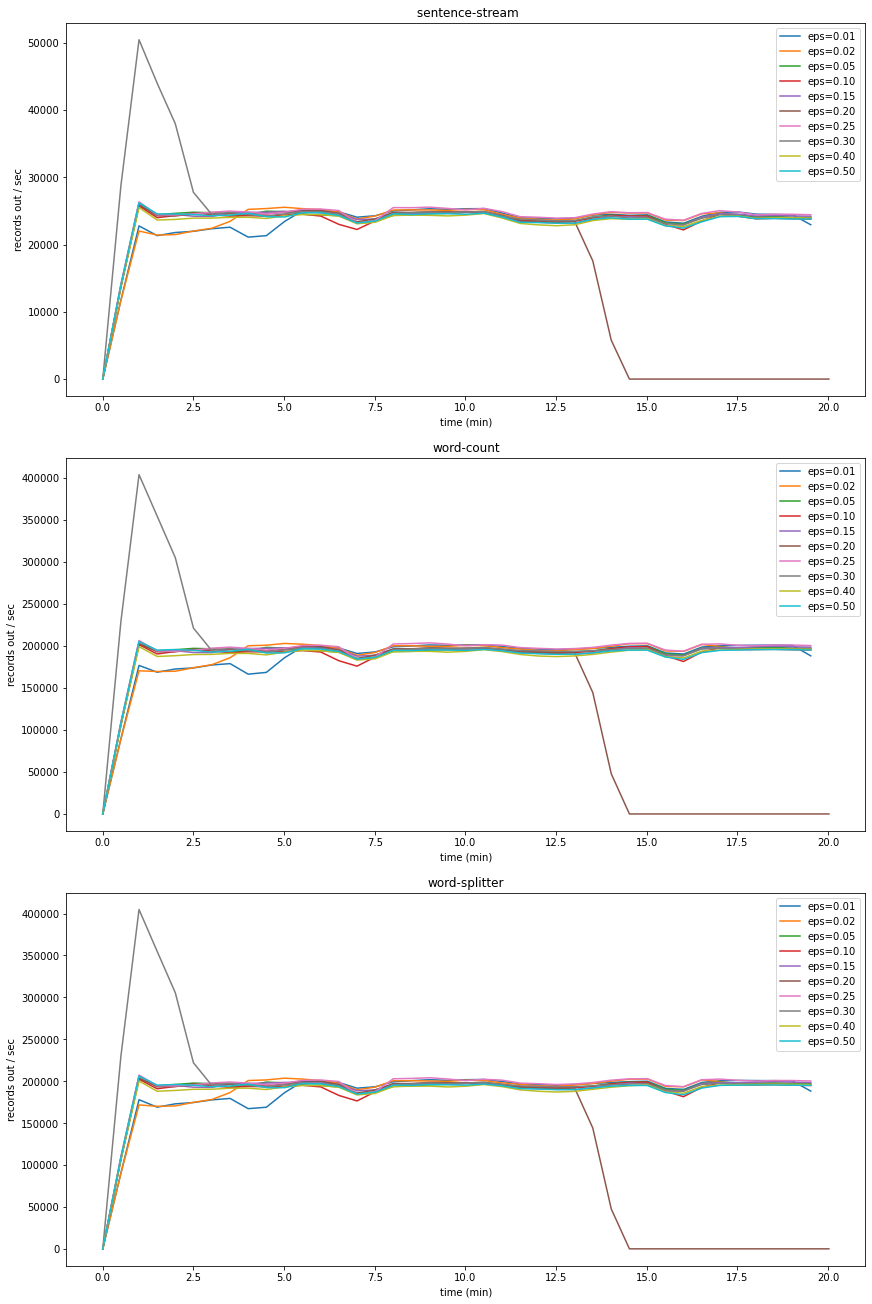

In [101]:
fig, axes = plt.subplots(len(out_operator_names), figsize=(12,18), constrained_layout=True)
loc_placement = 'upper right'

for idx, ax in enumerate(axes):
    label_1 = out_operator_names[idx]
    ax.set_title(label_1)
    ax.tick_params(axis='x', rotation=x_tick_rotation )
    for grp_op_rec_out_dataset in grouped_operator_rec_out:
        specific_op_rec_out = grp_op_rec_out_dataset.loc[
        grp_op_rec_out_dataset['operator_name'] == out_operator_names[idx]]
        schedule_mode = specific_op_rec_out['schedule_mode'].unique()[0]
        ax.plot(specific_op_rec_out['rel_time'], specific_op_rec_out['rate'],
                label=schedule_mode)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records out / sec')
    ax.legend(loc='best')

plt.savefig('operator_metrics_out.png')

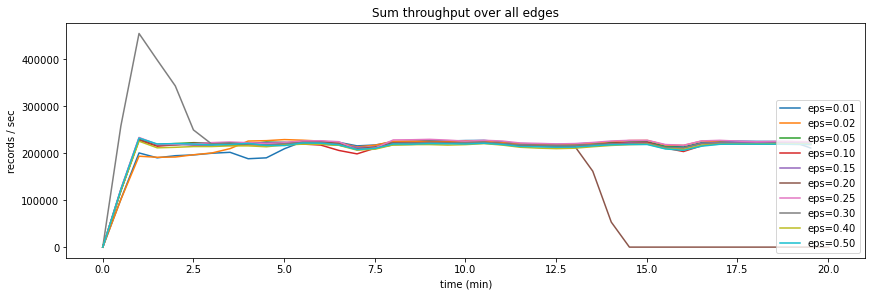

In [102]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in grouped_operator_rec_proc:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.plot(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode)    

    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='lower right')

plt.savefig('operator_metrics_proc.png')
plt.savefig('operator_metrics_proc.pdf')

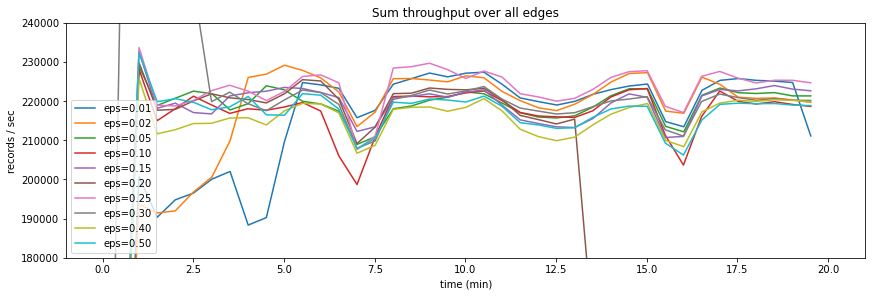

In [103]:
ylim_lower = 180000
ylim_upper = 240000

fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in grouped_operator_rec_proc:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.plot(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode)    

    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(ylim_lower,ylim_upper)

plt.savefig('operator_metrics_proc_short_y.png')
plt.savefig('operator_metrics_proc_short_y.pdf')

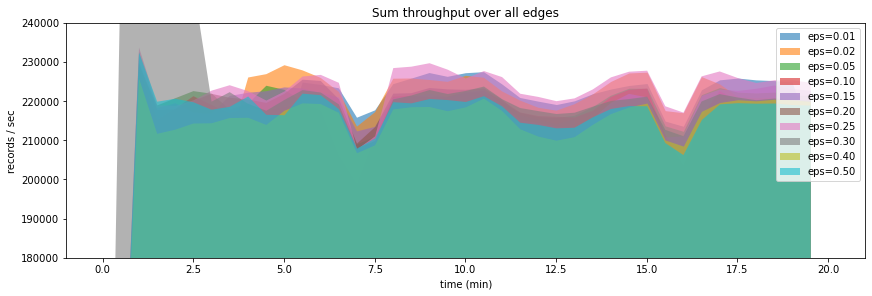

In [104]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in grouped_operator_rec_proc:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(ylim_lower,ylim_upper)

plt.savefig('operator_metrics_proc_short_y_coloured.png')
plt.savefig('operator_metrics_proc_short_y_coloured.pdf')

In [105]:
for grp_op_rec_proc_dataset in grouped_operator_rec_proc:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    print('AUC ({}) : \t{:,.2f}'.format(schedule_mode, 
                                 auc(grp_op_rec_proc_dataset['rel_time'],
                                     grp_op_rec_proc_dataset['rate'] * 60)))

AUC (eps=0.01) : 	246,795,131.01
AUC (eps=0.02) : 	249,412,838.87
AUC (eps=0.05) : 	250,920,770.21
AUC (eps=0.10) : 	248,875,024.67
AUC (eps=0.15) : 	251,132,188.24
AUC (eps=0.20) : 	175,322,119.91
AUC (eps=0.25) : 	255,547,679.40
AUC (eps=0.30) : 	271,703,618.58
AUC (eps=0.40) : 	246,869,932.59
AUC (eps=0.50) : 	248,894,202.23


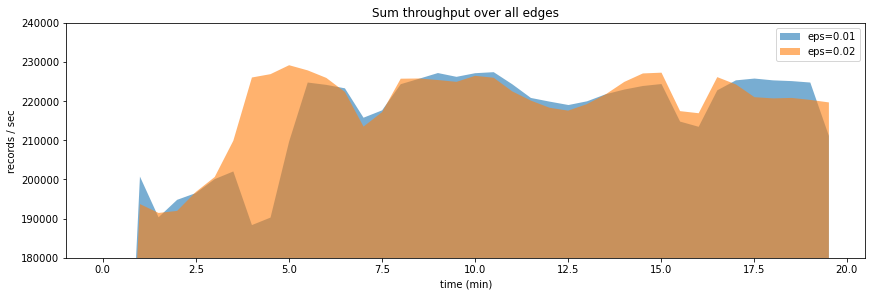

In [106]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in [grouped_operator_rec_proc[i] for i in [0,1]]:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(ylim_lower,ylim_upper)

plt.savefig('operator_metrics_proc_short_y_traffic_based.pdf')

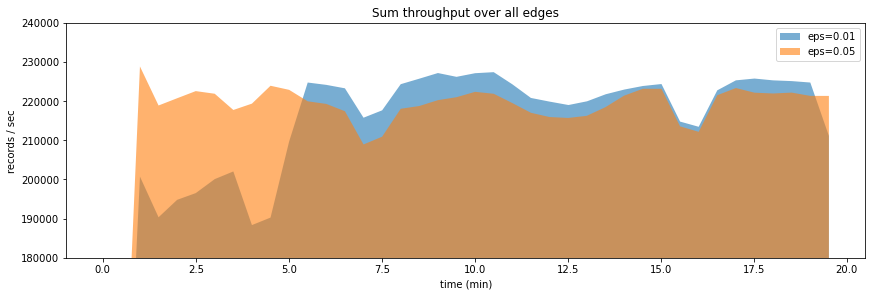

In [107]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in [grouped_operator_rec_proc[i] for i in [0,2]]:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(ylim_lower,ylim_upper)

plt.savefig('operator_metrics_proc_short_y_drl_based.pdf')

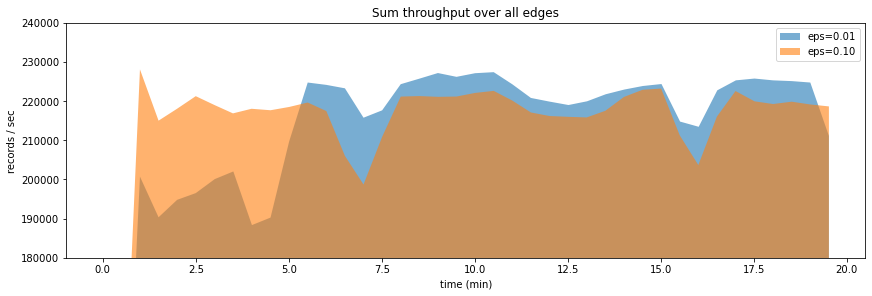

In [108]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in [grouped_operator_rec_proc[i] for i in [0,3]]:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(ylim_lower,ylim_upper)

plt.savefig('operator_metrics_proc_short_y_adaptive.pdf')

In [109]:
print("Done.")

Done.
